# PAN Card Real v/s Fake Detector

# import the necessary Libraries

In [2]:
from PIL import Image
import cv2 # openCV  

# Open/read the images

In [3]:
real=Image.open('data/pan-card real.jpg')
fake=Image.open('data/fake.png')

# Check the size and type of image 

In [4]:
# real
print("Real image format : ",real.format) 
print("Real image size : ",real.size) 

Real image format :  JPEG
Real image size :  (1200, 800)


In [5]:
# fake
print("Fake image format : ",fake.format) 
print("Fake image size : ",fake.size) 

Fake image format :  PNG
Fake image size :  (282, 179)


# Let's change the format and size of images

In [6]:
#for real image

#resize
real = real.resize((260, 170))
print(real.size)
#save
real.save('images after resizing and format changing/real.png')

(260, 170)


In [7]:
#for fake image

#resize
fake = fake.resize((260, 170))
print(fake.size)
#save
fake.save('images after resizing and format changing/fake.png')

(260, 170)


# Let's reopen after changing the size and format

In [8]:
real=Image.open('images after resizing and format changing/real.png')
fake=Image.open('images after resizing and format changing/fake.png')

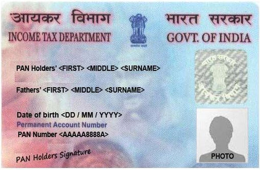

In [9]:
real

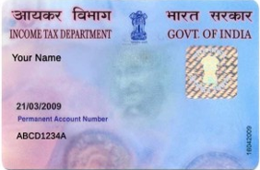

In [10]:
fake

# let's load the images using OpenCV for preprocessig

In [11]:
real_cv=cv2.imread('images after resizing and format changing/real.png') #BGR 
fake_cv=cv2.imread('images after resizing and format changing/fake.png')

# As coloured images have 3 channels i,e RGB we need to convert it to one channel i.e gray channel for better preprocessing

In [12]:
real_gray=cv2.cvtColor(real_cv,cv2.COLOR_BGR2GRAY) 
fake_gray=cv2.cvtColor(fake_cv,cv2.COLOR_BGR2GRAY)

# Calculate Structural Similarity Index (SSIM)

In [13]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(image1, image2):
    ssim_value = ssim(image1, image2)
    return ssim_value

In [14]:
ssim_value = calculate_ssim(real_gray, fake_gray)
print(f"SSIM Value: {ssim_value}")

SSIM Value: 0.3201825298269705


# Compute absolute difference Visualize

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def compare_and_visualize(image1, image2):

    # Compute absolute difference
    diff = cv2.absdiff(image1, image2)

    # Display images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(131)
    plt.title('Image 1')
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(132)
    plt.title('Image 2')
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(133)
    plt.title('Absolute Difference')
    plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

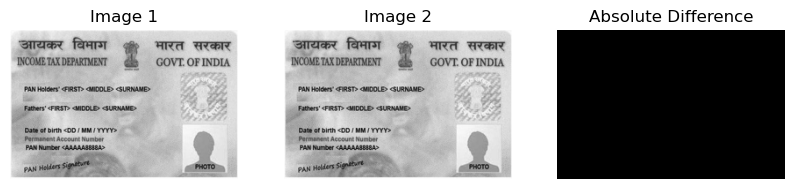

In [17]:
compare_and_visualize(real_gray, real_gray)

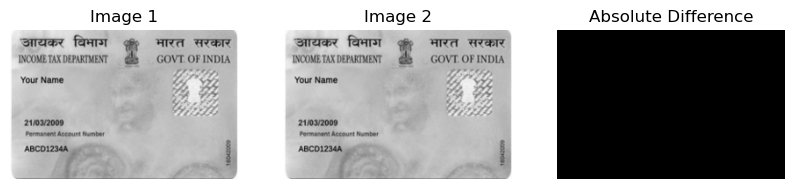

In [18]:
compare_and_visualize(fake_gray,fake_gray)

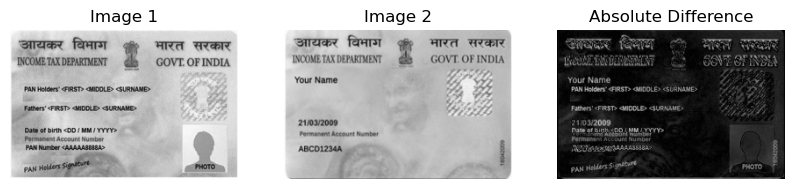

In [19]:
compare_and_visualize(real_gray,fake_gray)

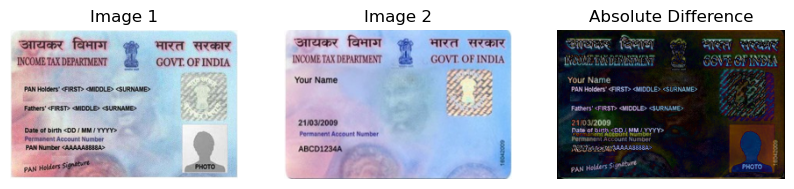

In [20]:
compare_and_visualize(real_cv,fake_cv)

In [ ]:
cv2==4.7.0

In [ ]:
streamlit==1.27.0
Pillow==9.4.0
opencv==4.7.0
numpy==1.22.4
scikit-image==0.19.3